# Where should I open my new Mexican restaurant?

## 1. Bussiness problem

The client, propietary of a known franchise of Mexican restaurants, wants to expand his bussiness to Canada and decided to begin his expansion project in Toronto. He's never lived in the city so he needs help to analyze which is the most appropiate neighbourhood to stablish his first restaurant.

I will search for information online about the demographic and economic profile of the population in each neighbourhood to be able to make a cluster analysis which will help me to determine the optimal place or places where the restaurant should be sited.

## 2. Data Sources

First I scrapped the wikipedia website to obtain the neighbourhood information (https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050).

Then, I obtained the coordinates of each neighbourhood's centroid from the website https://cocl.us/Geospatial_data

I will use the Foursquare API to find the number of Mexican restaurants in each neighbourhood and have a view of the level of competition and offer. 

Looking for information online I found in the "Toronto’s Open Data Portal" many demographic and economic metrics of the Toronto neighbourhoods. I extracted from it information about the total population, the population from latin american countries and the income in each neighbourhood. 
Here's the link: https://bit.ly/3airrOJ 

## 3. Data cleaning and manipulation

### 3.1 Extract neighbourhoods data

First we will extract the data of the neighbourhoods of Toronto from Wikipedia.

In [30]:
import pandas as pd
import numpy as np

In [31]:
data = pd.read_html("https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050")

In [32]:
print(len(data)) ##Know how many tables are in the URL

3


In [33]:
tabla=data[0] ##We want the first table 
tabla

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
...,...,...,...
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West
285,M8Z,Etobicoke,South of Bloor


In [35]:
borrarNA = tabla[ tabla['Borough'] == 'Not assigned' ].index ##Drop Not assigned Boroughs 
tabla.drop(borrarNA , inplace=True)
tabla.reset_index(inplace=True)
tabla

,index,Postcode,Borough,Neighbourhood
0,2,M3A,North York,Parkwoods
1,3,M4A,North York,Victoria Village
2,4,M5A,Downtown Toronto,Harbourfront
3,5,M6A,North York,Lawrence Heights
4,6,M6A,North York,Lawrence Manor
...,...,...,...,...
205,281,M8Z,Etobicoke,Kingsway Park South West
206,282,M8Z,Etobicoke,Mimico NW
207,283,M8Z,Etobicoke,The Queensway West
208,284,M8Z,Etobicoke,Royal York South West


In [36]:
tabla.drop(columns=['index'], inplace=True) ##Drop index column
tabla

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor
...,...,...,...
205,M8Z,Etobicoke,Kingsway Park South West
206,M8Z,Etobicoke,Mimico NW
207,M8Z,Etobicoke,The Queensway West
208,M8Z,Etobicoke,Royal York South West


In [27]:
tabla.shape

(103, 4)

### 3.2. Extract postal code coordinates

In [37]:
!pip install geocoder 
import geocoder # import geocoder


In [39]:
coord=pd.read_csv("http://cocl.us/Geospatial_data")

tablaconcoord=tabla.join(coord.set_index('Postal Code'), on='Postcode')
tablaconcoord

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Heights,43.718518,-79.464763
4,M6A,North York,Lawrence Manor,43.718518,-79.464763
...,...,...,...,...,...
205,M8Z,Etobicoke,Kingsway Park South West,43.628841,-79.520999
206,M8Z,Etobicoke,Mimico NW,43.628841,-79.520999
207,M8Z,Etobicoke,The Queensway West,43.628841,-79.520999
208,M8Z,Etobicoke,Royal York South West,43.628841,-79.520999


### 3.3. Extract economic and demographic data

Now we will extract the public data of income, population and latin american population in each neighbourhood. Then we will match both datasets.

In [43]:
sddata = pd.read_csv("Datos_Toronto.csv")
sddata.head()

,Neighbourhood,Neighbourhood Id,Combined Indicators,After-Tax Household Income,Latin American,Total Population
0,West Humber-Clairville,1.0,NaN,59703.0,1300.0,33312.0
1,Mount Olive-Silverstone-Jamestown,2.0,NaN,46986.0,1085.0,32954.0
2,Thistletown-Beaumond Heights,3.0,NaN,57522.0,660.0,10360.0
3,Rexdale-Kipling,4.0,NaN,51194.0,850.0,10529.0
4,Elms-Old Rexdale,5.0,NaN,49425.0,765.0,9456.0


In [44]:
sddata.drop(columns=['Neighbourhood Id', 'Combined Indicators'], inplace=True) ##Drop index column
sddata

,Neighbourhood,After-Tax Household Income,Latin American,Total Population
0,West Humber-Clairville,59703.0,1300.0,33312.0
1,Mount Olive-Silverstone-Jamestown,46986.0,1085.0,32954.0
2,Thistletown-Beaumond Heights,57522.0,660.0,10360.0
3,Rexdale-Kipling,51194.0,850.0,10529.0
4,Elms-Old Rexdale,49425.0,765.0,9456.0
...,...,...,...,...
135,West Hill,46803.0,555.0,27392.0
136,Woburn,47908.0,745.0,53485.0
137,Eglinton East,42790.0,400.0,22776.0
138,Scarborough Village,40181.0,280.0,16724.0


### 3.4. Merge all 

In [100]:
tablafinal = pd.merge(tablaconcoord, sddata, on='Neighbourhood', how='inner').reset_index(drop=True)
tablafinal

,Postcode,Borough,Neighbourhood,Latitude,Longitude,After-Tax Household Income,Latin American,Total Population
0,M4A,North York,Victoria Village,43.725882,-79.315572,43743.0,430.0,17510.0
1,M1B,Scarborough,Rouge,43.806686,-79.194353,72784.0,495.0,46496.0
2,M1B,Scarborough,Malvern,43.806686,-79.194353,53425.0,770.0,43794.0
3,M1C,Scarborough,Highland Creek,43.784535,-79.160497,87321.0,205.0,12494.0
4,M3C,North York,Flemingdon Park,43.725900,-79.340923,43511.0,390.0,21933.0
5,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,49252.0,530.0,14365.0
6,M9C,Etobicoke,Markland Wood,43.643515,-79.577201,64297.0,135.0,10554.0
7,M1E,Scarborough,Guildwood,43.763573,-79.188711,67678.0,120.0,9917.0
8,M1E,Scarborough,Morningside,43.763573,-79.188711,50069.0,345.0,17455.0
9,M1E,Scarborough,West Hill,43.763573,-79.188711,46803.0,555.0,27392.0


In [141]:
tablagrupo=tablafinal.groupby("Postcode")["Neighbourhood"].apply(list)
tablagrupo2=tablafinal.groupby(["Postcode", "Borough"])["After-Tax Household Income","   Latin American", "Total Population"].sum()
tablagrupo3=tablafinal.groupby("Postcode")["Latitude","Longitude"].mean()
tablagrupo4=tablafinal.groupby("Postcode")["Borough"].apply(list)

tablafinal2 = pd.merge(tablagrupo, tablagrupo2, on='Postcode', how='inner') 
tablafinal3= pd.merge(tablafinal2, tablagrupo3, on='Postcode', how='inner')
tablafinal4= pd.merge(tablafinal3, tablagrupo4, on='Postcode', how='inner').reset_index()

tablafinal4= tablafinal4[["Postcode","Borough","Neighbourhood","Latitude", "Longitude", "After-Tax Household Income", "   Latin American", "Total Population"]]

#tablafinal2=pd.merge(tablafinal2, tablafinal["Latitude","Longitude"], on='Postcode', how='inner').reset_index(drop=True)
#tablafinal2

C:\Users\adant\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\adant\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [142]:
tablafinal4["Pct Latin American"]=tablafinal4["   Latin American"] / tablafinal4["Total Population"]* 100
tablafinal4.drop(columns=["   Latin American"], inplace=True)
tablafinal4.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude,After-Tax Household Income,Total Population,Pct Latin American
0,M1B,"[Scarborough, Scarborough]","[Rouge, Malvern]",43.806686,-79.194353,126209.0,90290.0,1.401041
1,M1C,[Scarborough],[Highland Creek],43.784535,-79.160497,87321.0,12494.0,1.640788
2,M1E,"[Scarborough, Scarborough, Scarborough]","[Guildwood, Morningside, West Hill]",43.763573,-79.188711,164550.0,54764.0,1.862537
3,M1G,[Scarborough],[Woburn],43.770992,-79.216917,47908.0,53485.0,1.392914
4,M1J,[Scarborough],[Scarborough Village],43.744734,-79.239476,40181.0,16724.0,1.674241


## 4. Exploring data

Now I will make a map to visualize the neighbourhoods and then, using the Foursquare API, I will count the number of Latin American restaurants around each point.

In [143]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [144]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude


In [150]:
# create map of Toronto using latitude and longitude values
map_toronto= folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(tablafinal4['Latitude'], tablafinal4['Longitude'], tablafinal4['Borough'], tablafinal4['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
    
map_toronto

In [201]:
CLIENT_ID = 'MyCLIENT_ID' # your Foursquare ID
CLIENT_SECRET = 'MyCLIENTE_ID_SECRET' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: 3YTMIWAVOBRGD0IXCTC2H5IFHNHO5BKJO2HJEH2X1OX4UBNL
CLIENT_SECRET:TXGM2BGKZOUL54EPF2MFLOTM14AVZAROXO000ARFNQ5GUGQQ


In [202]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=50):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [213]:
toronto_venues = getNearbyVenues(names=tablaconcoord['Postcode'],
                                   latitudes=tablaconcoord['Latitude'],
                                   longitudes=tablaconcoord['Longitude'], LIMIT=50
                                  )
print(toronto_venues.shape)
toronto_venues.head()

M3A
M4A
M5A
M6A
M6A
M7A
M9A
M1B
M1B
M3B
M4B
M4B
M5B
M5B
M6B
M9B
M9B
M9B
M9B
M9B
M1C
M1C
M1C
M3C
M3C
M4C
M5C
M6C
M9C
M9C
M9C
M9C
M1E
M1E
M1E
M4E
M5E
M6E
M1G
M4G
M5G
M6G
M1H
M2H
M3H
M3H
M3H
M4H
M5H
M5H
M5H
M6H
M6H
M1J
M2J
M2J
M2J
M3J
M3J
M4J
M5J
M5J
M5J
M6J
M6J
M1K
M1K
M1K
M2K
M3K
M3K
M4K
M4K
M5K
M5K
M6K
M6K
M6K
M1L
M1L
M1L
M2L
M2L
M3L
M4L
M4L
M5L
M5L
M6L
M6L
M6L
M9L
M1M
M1M
M1M
M2M
M2M
M3M
M4M
M5M
M5M
M6M
M6M
M6M
M6M
M9M
M9M
M1N
M1N
M2N
M3N
M4N
M5N
M6N
M6N
M9N
M1P
M1P
M1P
M2P
M4P
M5P
M5P
M6P
M6P
M9P
M1R
M1R
M2R
M4R
M5R
M5R
M5R
M6R
M6R
M7R
M9R
M9R
M9R
M9R
M1S
M4S
M5S
M5S
M6S
M6S
M1T
M1T
M1T
M4T
M4T
M5T
M5T
M5T
M1V
M1V
M1V
M1V
M4V
M4V
M4V
M4V
M4V
M5V
M5V
M5V
M5V
M5V
M5V
M5V
M8V
M8V
M8V
M9V
M9V
M9V
M9V
M9V
M9V
M9V
M9V
M1W
M4W
M5W
M8W
M8W
M9W
M1X
M4X
M4X
M5X
M5X
M8X
M8X
M8X
M4Y
M7Y
M8Y
M8Y
M8Y
M8Y
M8Y
M8Y
M8Y
M8Y
M8Z
M8Z
M8Z
M8Z
M8Z
(3266, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M3A,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,M3A,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,M4A,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,M4A,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,M4A,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [214]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
M1B,2,2,2,2,2,2
M1C,6,6,6,6,6,6
M1E,24,24,24,24,24,24
M1G,4,4,4,4,4,4
M1H,8,8,8,8,8,8
...,...,...,...,...,...,...
M9N,2,2,2,2,2,2
M9P,6,6,6,6,6,6
M9R,16,16,16,16,16,16


In [215]:
toronto_venues['Venue Category'].unique()

array(['Park', 'Food & Drink Shop', 'Hockey Arena',
       'Portuguese Restaurant', 'Coffee Shop', 'Intersection',
       'Pizza Place', 'Bakery', 'Distribution Center', 'Spa',
       'Restaurant', 'Pub', 'Historic Site', 'Gym / Fitness Center',
       'Breakfast Spot', 'Chocolate Shop', 'Farmers Market',
       'Dessert Shop', 'Mexican Restaurant', 'Performing Arts Venue',
       'French Restaurant', 'Theater', 'Yoga Studio', 'Café',
       'Event Space', 'Shoe Store', 'Art Gallery', 'Brewery',
       'Electronics Store', 'Bank', 'Beer Store', 'Hotel', 'Antique Shop',
       'Boutique', 'Furniture / Home Store', 'Vietnamese Restaurant',
       'Accessories Store', 'Clothing Store', "Women's Store",
       'Gift Shop', 'Italian Restaurant', 'Sushi Restaurant', 'Beer Bar',
       'Creperie', 'Arts & Crafts Store', 'Hobby Shop', 'Diner',
       'Fried Chicken Joint', 'Chinese Restaurant', 'Smoothie Shop',
       'Sandwich Place', 'Gym', 'College Auditorium', 'Bar',
       'College Cafete

In [216]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,M3A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M3A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M4A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M4A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M4A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped = toronto_grouped[['Neighbourhood', 'Mexican Restaurant']]
toronto_grouped.set_index('Neighbourhood', inplace=True)
toronto_grouped

,Mexican Restaurant
Neighbourhood,
M1B,0.000
M1C,0.000
M1E,0.125
M1G,0.250
M1H,0.000
...,...
M9N,0.000
M9P,0.000
M9R,0.000


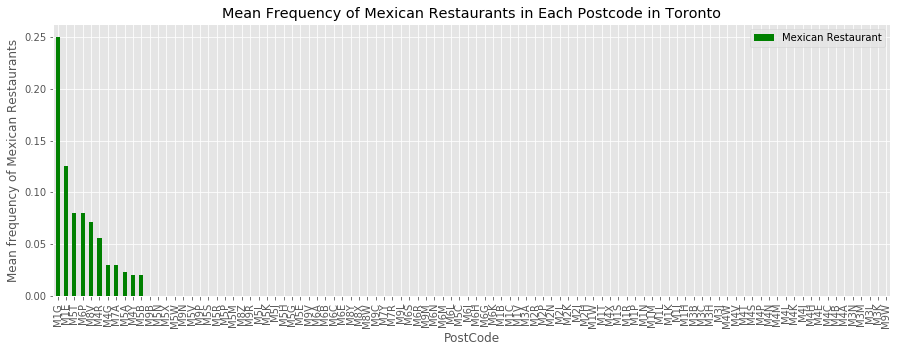

In [218]:
# sort by descending order
toronto_grouped.sort_values(by='Mexican Restaurant', ascending=False, inplace=True)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
toronto_grouped.plot(kind='bar', color='green', figsize=(15,5))

plt.title('Mean Frequency of Mexican Restaurants in Each Postcode in Toronto')
plt.xlabel('PostCode')
plt.ylabel('Mean frequency of Mexican Restaurants')

plt.show()

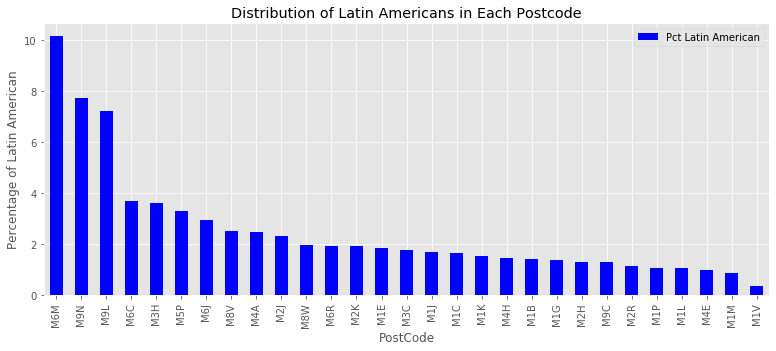

In [219]:

pct_latin = tablafinal4[['Postcode', 'Pct Latin American']].set_index('Postcode')

# sort by descending order
pct_latin.sort_values(by='Pct Latin American', ascending=False, inplace=True)

#plot bar graph
pct_latin.plot(kind='bar', color="blue", figsize=(13,5))
plt.title('Distribution of Latin Americans in Each Postcode')
plt.xlabel('PostCode')
plt.ylabel('Percentage of Latin American')

plt.show()

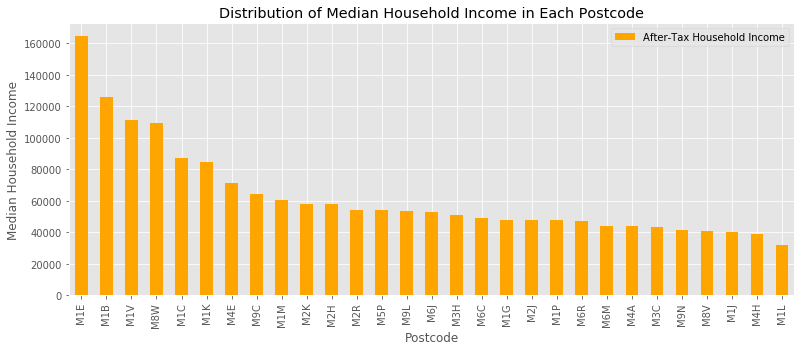

In [220]:
income = tablafinal4[['Postcode', 'After-Tax Household Income']].set_index('Postcode')

# sort by descending order
income.sort_values(by='After-Tax Household Income', ascending=False, inplace=True)

#plot bar graph
income.plot(kind='bar', color="orange", figsize=(13,5))
plt.title('Distribution of Median Household Income in Each Postcode')
plt.xlabel('Postcode')
plt.ylabel('Median Household Income')

plt.show()

Now let's join the venues results with our data and make the final dataset to make our cluster analysis:

In [221]:
df_final=tablafinal4.join(toronto_grouped, on='Postcode', lsuffix='_left', rsuffix='_right')
df_final

,Postcode,Borough,Neighbourhood,Latitude,Longitude,After-Tax Household Income,Total Population,Pct Latin American,Mexican Restaurant
0,M1B,"[Scarborough, Scarborough]","[Rouge, Malvern]",43.806686,-79.194353,126209.0,90290.0,1.401041,0.000000
1,M1C,[Scarborough],[Highland Creek],43.784535,-79.160497,87321.0,12494.0,1.640788,0.000000
2,M1E,"[Scarborough, Scarborough, Scarborough]","[Guildwood, Morningside, West Hill]",43.763573,-79.188711,164550.0,54764.0,1.862537,0.125000
3,M1G,[Scarborough],[Woburn],43.770992,-79.216917,47908.0,53485.0,1.392914,0.250000
4,M1J,[Scarborough],[Scarborough Village],43.744734,-79.239476,40181.0,16724.0,1.674241,0.000000
5,M1K,"[Scarborough, Scarborough]","[Ionview, Kennedy Park]",43.727929,-79.262029,84747.0,30764.0,1.544012,0.000000
6,M1L,[Scarborough],[Oakridge],43.711112,-79.284577,32079.0,13845.0,1.047309,0.000000
7,M1M,[Scarborough],[Cliffcrest],43.716316,-79.239476,60384.0,15935.0,0.847192,0.000000
8,M1P,[Scarborough],[Dorset Park],43.757410,-79.273304,47630.0,25003.0,1.079870,0.000000
9,M1V,"[Scarborough, Scarborough]","[Agincourt North, Milliken]",43.815252,-79.284577,111357.0,55685.0,0.368142,0.000000


## 5. Clustering


First, we need to normalize data:

In [225]:
from sklearn.preprocessing import StandardScaler
X = df_final.values[:,5:]
X = np.nan_to_num(X)
Cluster_data = StandardScaler().fit_transform(X)
Cluster_data

array([[ 2.12524345,  3.80754391, -0.50427237, -0.3000096 ],
       [ 0.82045078, -0.63276585, -0.39428078, -0.3000096 ],
       [ 3.41168285,  1.7798504 , -0.29254575,  2.13606836],
       [-0.50195698,  1.70684978, -0.50800099,  4.57214631],
       [-0.76121776, -0.391333  , -0.3789331 , -0.3000096 ],
       [ 0.73408645,  0.4100186 , -0.43867954, -0.3000096 ],
       [-1.03306075, -0.55565573, -0.66655837, -0.3000096 ],
       [-0.08335502, -0.43636622, -0.75836899, -0.3000096 ],
       [-0.5112846 ,  0.0812019 , -0.65161998, -0.3000096 ],
       [ 1.62692056,  1.83241769, -0.97814869, -0.3000096 ],
       [-0.17401408, -0.37934697, -0.55101301, -0.3000096 ],
       [-0.51031158, -0.4484664 , -0.08200913, -0.3000096 ],
       [-0.16240489, -0.12467241, -0.26790516, -0.3000096 ],
       [-0.28997179, -0.37923281, -0.63235103, -0.3000096 ],
       [-0.64948767, -0.09402242, -0.33126469, -0.3000096 ],
       [-0.39566242, -0.43990495,  0.51489662, -0.3000096 ],
       [-0.64170347, -0.

In [240]:
df_normalized = pd.DataFrame(Cluster_data)
df_normalized.rename(columns={0:'Household Income', 1:'% Total Population', 2:'Pct Latin American', 3:'No. of Mexican Restaurants'}, inplace=True)
df_normalized.head()

,Household Income,% Total Population,Pct Latin American,No. of Mexican Restaurants
0,2.125243,3.807544,-0.504272,-0.300010
1,0.820451,-0.632766,-0.394281,-0.300010
2,3.411683,1.779850,-0.292546,2.136068
3,-0.501957,1.706850,-0.508001,4.572146
4,-0.761218,-0.391333,-0.378933,-0.300010


Once normalization is done, we need to choose the optimal K for the K-means clustering method

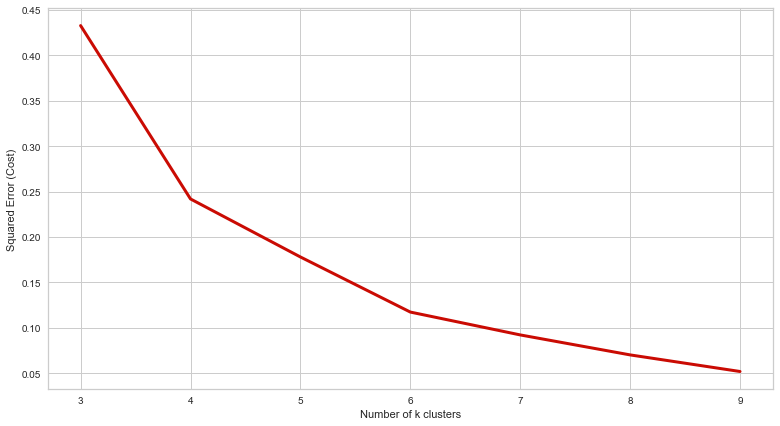

In [241]:
from sklearn.cluster import KMeans

error_cost=[]

for i in range(3, 10):
  KM = KMeans(n_clusters=i, max_iter=100)
  try:
    KM.fit(df_normalized)

  except ValueError:
    print('Error on line', i)

  # calculate squared error for the clustered points
  error_cost.append(KM.inertia_ / 100)

# plot the K values against the squared error cost
plt.figure(figsize=(13,7))
plt.plot(range(3,10), error_cost, color='r', linewidth=3)
plt.xlabel('Number of k clusters')
plt.ylabel('Squared Error (Cost)')


plt.show()


As we can see in the graphic above, there's an elbow when the number of clusters is equal to 6, so we'll use  K=6

In [242]:
k = 6

# run k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(df_normalized)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 5, 1, 3, 0, 5, 0, 0, 0, 4])

Now, we'll add the cluster id to the dataset:

In [248]:
df_clustered = pd.merge(df_final, df_normalized, left_index=True, right_index=True)
df_clustered.insert(0, 'Cluster', kmeans.labels_)
df_clustered.drop(['Household Income', '% Total Population','Pct Latin American_y', 'No. of Mexican Restaurants'], axis=1, inplace=True)
df_clustered

,Cluster,Postcode,Borough,Neighbourhood,Latitude,Longitude,After-Tax Household Income,Total Population,Pct Latin American_x,Mexican Restaurant
0,4,M1B,"[Scarborough, Scarborough]","[Rouge, Malvern]",43.806686,-79.194353,126209.0,90290.0,1.401041,0.000000
1,5,M1C,[Scarborough],[Highland Creek],43.784535,-79.160497,87321.0,12494.0,1.640788,0.000000
2,1,M1E,"[Scarborough, Scarborough, Scarborough]","[Guildwood, Morningside, West Hill]",43.763573,-79.188711,164550.0,54764.0,1.862537,0.125000
3,3,M1G,[Scarborough],[Woburn],43.770992,-79.216917,47908.0,53485.0,1.392914,0.250000
4,0,M1J,[Scarborough],[Scarborough Village],43.744734,-79.239476,40181.0,16724.0,1.674241,0.000000
5,5,M1K,"[Scarborough, Scarborough]","[Ionview, Kennedy Park]",43.727929,-79.262029,84747.0,30764.0,1.544012,0.000000
6,0,M1L,[Scarborough],[Oakridge],43.711112,-79.284577,32079.0,13845.0,1.047309,0.000000
7,0,M1M,[Scarborough],[Cliffcrest],43.716316,-79.239476,60384.0,15935.0,0.847192,0.000000
8,0,M1P,[Scarborough],[Dorset Park],43.757410,-79.273304,47630.0,25003.0,1.079870,0.000000
9,4,M1V,"[Scarborough, Scarborough]","[Agincourt North, Milliken]",43.815252,-79.284577,111357.0,55685.0,0.368142,0.000000


In [251]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)

# set color schemes for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_clustered['Latitude'], df_clustered['Longitude'], df_clustered['Neighbourhood'], df_clustered['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 6. Final look at the clusters

### Cluster 0

In [252]:
df_clustered.loc[df_clustered['Cluster'] == 0]

,Cluster,Postcode,Borough,Neighbourhood,Latitude,Longitude,After-Tax Household Income,Total Population,Pct Latin American_x,Mexican Restaurant
4,0,M1J,[Scarborough],[Scarborough Village],43.744734,-79.239476,40181.0,16724.0,1.674241,0.000000
6,0,M1L,[Scarborough],[Oakridge],43.711112,-79.284577,32079.0,13845.0,1.047309,0.000000
7,0,M1M,[Scarborough],[Cliffcrest],43.716316,-79.239476,60384.0,15935.0,0.847192,0.000000
8,0,M1P,[Scarborough],[Dorset Park],43.757410,-79.273304,47630.0,25003.0,1.079870,0.000000
10,0,M2H,[North York],[Hillcrest Village],43.803762,-79.363452,57682.0,16934.0,1.299161,0.000000
11,0,M2J,[North York],[Henry Farm],43.778517,-79.346556,47659.0,15723.0,2.321440,0.000000
12,0,M2K,[North York],[Bayview Village],43.786947,-79.385975,58028.0,21396.0,1.916246,0.000000
13,0,M2R,[North York],[Willowdale West],43.782736,-79.442259,54226.0,16936.0,1.121871,0.000000
14,0,M3C,[North York],[Flemingdon Park],43.725900,-79.340923,43511.0,21933.0,1.778143,0.000000
15,0,M3H,[North York],[Bathurst Manor],43.754328,-79.442259,51076.0,15873.0,3.622504,0.000000


In this cluster we've got many neighbourhoods. We can see that that they're low populated neighbourhoods, with a medium percentage of Latin Americans and medium Income. The competition is practically null.

### Cluster 1

In [253]:
df_clustered.loc[df_clustered['Cluster'] == 1]

,Cluster,Postcode,Borough,Neighbourhood,Latitude,Longitude,After-Tax Household Income,Total Population,Pct Latin American_x,Mexican Restaurant
2,1,M1E,"[Scarborough, Scarborough, Scarborough]","[Guildwood, Morningside, West Hill]",43.763573,-79.188711,164550.0,54764.0,1.862537,0.125


This cluster is made up of one Postcode with 3 neighbourhoods, they have a high income and they're high populated. We can see there are some competitors in the area.

### Cluster 2

In [254]:
df_clustered.loc[df_clustered['Cluster'] == 2]

,Cluster,Postcode,Borough,Neighbourhood,Latitude,Longitude,After-Tax Household Income,Total Population,Pct Latin American_x,Mexican Restaurant
22,2,M6M,[York],[Mount Dennis],43.691116,-79.476013,43790.0,13593.0,10.152284,0.0
27,2,M9L,[North York],[Humber Summit],43.756303,-79.565963,53272.0,12416.0,7.208441,0.0
28,2,M9N,[York],[Weston],43.706876,-79.518188,41356.0,17992.0,7.725656,0.0


This Cluster represents 3 neighbourhoods with a high percentage of latin american people, medium income and no competition.

### Cluster 3

In [255]:
df_clustered.loc[df_clustered['Cluster'] == 3]

,Cluster,Postcode,Borough,Neighbourhood,Latitude,Longitude,After-Tax Household Income,Total Population,Pct Latin American_x,Mexican Restaurant
3,3,M1G,[Scarborough],[Woburn],43.770992,-79.216917,47908.0,53485.0,1.392914,0.25


This cluster is made up exclusively of one neighbourhood. It's much more populated than the average. The income and the percentage of latin american people is medium. Also there's some competitors in the area.

### Cluster 4

In [256]:
df_clustered.loc[df_clustered['Cluster'] == 4]

,Cluster,Postcode,Borough,Neighbourhood,Latitude,Longitude,After-Tax Household Income,Total Population,Pct Latin American_x,Mexican Restaurant
0,4,M1B,"[Scarborough, Scarborough]","[Rouge, Malvern]",43.806686,-79.194353,126209.0,90290.0,1.401041,0.0
9,4,M1V,"[Scarborough, Scarborough]","[Agincourt North, Milliken]",43.815252,-79.284577,111357.0,55685.0,0.368142,0.0


This cluster it's also high populated, but it has a superior income and there's no competition.

### Cluster 5

In [257]:
df_clustered.loc[df_clustered['Cluster'] == 5]

,Cluster,Postcode,Borough,Neighbourhood,Latitude,Longitude,After-Tax Household Income,Total Population,Pct Latin American_x,Mexican Restaurant
1,5,M1C,[Scarborough],[Highland Creek],43.784535,-79.160497,87321.0,12494.0,1.640788,0.0
5,5,M1K,"[Scarborough, Scarborough]","[Ionview, Kennedy Park]",43.727929,-79.262029,84747.0,30764.0,1.544012,0.0
17,5,M4E,[East Toronto],[The Beaches],43.676357,-79.293031,70957.0,21567.0,0.996893,0.0
25,5,M8W,"[Etobicoke, Etobicoke]","[Alderwood, Long Branch]",43.602414,-79.543484,109082.0,22138.0,1.964947,0.0


This last cluster has a high income but the total population is low. The percentage of latin american people is medium and there's no competition.

## 7.Conclusion

Analyzing all the final clusters we've obtained, we'll recommend our client to open his new Mexican restaurant in one of the neighbourhoods of **Cluster 4**. 

That's, in the first place, because of the high income level, that allows people in that areas to eat in restaurants more often than in others. 

In second place, we can se that the percentage of latin american people is not very high, but the total inhabitants is. So there's a great community of latinos that are more likely to go to the restaurant. 

At last, we can also see that there's no competition, so our client will be the only one who'll offer that kind of food to the neighbours of the area.